# <center><font size=6>实训2
# <center><font size=3>训练目标：掌握主键合并的几种方法和多个键值的主键合并
# <center><font size=3>需求说明：线路线损数据，线路用电量趋势下降数据和线路告警是识别用户窃漏电与否的3个重要特征，需要对由线路编号（ID）和时间（date）两个键值构成的主键进行合并。
# <center><font size=3>实现思路和步骤：读取ele_loss.csv和alarm.csv表，查看两表的形状，以ID和date两个键值作为主键进行内连接，查看合并后的数据

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
data3=pd.read_csv('D:/Desktop/alarm.csv',encoding="gb18030")
data4=pd.read_csv('D:/Desktop/ele_loss.csv',encoding="gb18030")
print(data3.shape)
print("       ")
print(data4.shape)

(25, 3)
       
(49, 4)


In [30]:
data3['ID']=data3['ID'].astype('str')
data3['date']=data3['date'].astype('str')
data4['ID']=data4['ID'].astype('str')
data4['date']=data4['date'].astype('str')

In [31]:
import numpy as np
left=[]
right=[]
for row in data3:
    left.append(row)
print("       ")
print(left)

       
['ID', 'date', 'alarm']


In [32]:
for row in data4:
    right.append(row)
print("       ")
print(right)
print("       ")
print(pd.merge(data3,data4,how='outer',on=['ID','date']))

       
['ID', 'date', 'ele', 'loss']
       
          ID        date    alarm     ele      loss
0   21261001  2012/10/11     电压断相     NaN       NaN
1   21261001  2012/10/10  A相电流过负荷     NaN       NaN
2   21261001    2010/9/3    电流不平衡   858.0  0.151048
3   21261001    2010/9/6  C相电流过负荷   883.5  0.162778
4   21261001   2010/5/13    电流不平衡     NaN       NaN
5   21261001   2010/5/12     电压缺相     NaN       NaN
6   21261001   2010/2/15    电流不平衡     NaN       NaN
7   21261001   2010/9/16  C相电流过负荷   915.5  0.162028
8   21261001   2010/9/16  C相电流过负荷   915.5  0.162028
9   21261001   2010/9/17  A相电流过负荷   961.0  0.166650
10  21261001   2010/9/17    电流不平衡   961.0  0.166650
11  21261001   2011/9/15  C相电流过负荷     NaN       NaN
12  21261001   2010/8/11     电压断相     NaN       NaN
13  21261001   2010/7/20     电压断相     NaN       NaN
14  18403001   2010/7/21  C相电流过负荷     NaN       NaN
15  18403001   2010/7/22     电压缺相     NaN       NaN
16  18403001   2010/7/25  C相电流过负荷     NaN       NaN
17  21880001   201

In [33]:
print(pd.merge(data3,data4,how='inner',on=['ID','date']))
#用户21261001一直在进行偷漏电行为，而且集中于9月，警告原因多为电流过负荷和电流不平衡，用电量为800到900之间，线损为0.16左右

         ID       date    alarm    ele      loss
0  21261001   2010/9/3    电流不平衡  858.0  0.151048
1  21261001   2010/9/6  C相电流过负荷  883.5  0.162778
2  21261001  2010/9/16  C相电流过负荷  915.5  0.162028
3  21261001  2010/9/16  C相电流过负荷  915.5  0.162028
4  21261001  2010/9/17  A相电流过负荷  961.0  0.166650
5  21261001  2010/9/17    电流不平衡  961.0  0.166650


In [34]:
p=plt.figure(figsize=(25,5))
#plt.rcParams['font.sans-s3erif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
x=data4['ele']
y=data4['loss']
z=data4['date']

<Figure size 1800x360 with 0 Axes>

In [35]:
#对data3进行哑变量处理
pd.get_dummies(data3["alarm"])

,A相电流过负荷,C相电流过负荷,电压断相,电压缺相,电流不平衡
0,0,0,1,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,0,1
5,0,0,0,1,0
6,0,0,0,0,1
7,0,1,0,0,0
8,1,0,0,0,0
9,0,1,0,0,0


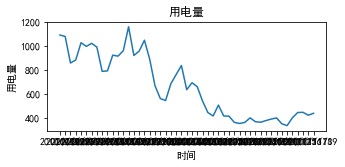

In [36]:
p=plt.figure(figsize=(5,2))
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
q=data4['ID']
x=data4['ele']
y=data4['loss']
z=data4['date']
plt.plot(z,x,'')
plt.xlabel('时间')
plt.ylabel('用电量')
#plt.legend([])
plt.title('用电量')
plt.show()
#用电量变化具有一定波动性，但是趋势为逐渐递减
#原因可能是偷漏电行为或者是这几个用户用电量本身的降低

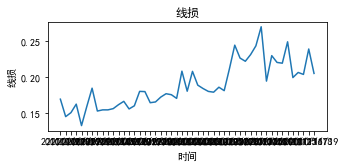

In [37]:
p=plt.figure(figsize=(5,2))
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.plot(z,y,'')
plt.xlabel('时间')
plt.ylabel('线损')
#plt.legend([])
plt.title('线损')
plt.show()
#线损率逐年递增，且也有一定周期性，可能随着季节变化波动
#线损原因可能是线路老化，人为破化等等

In [38]:
#newdata3=data3.drop_duplicates();

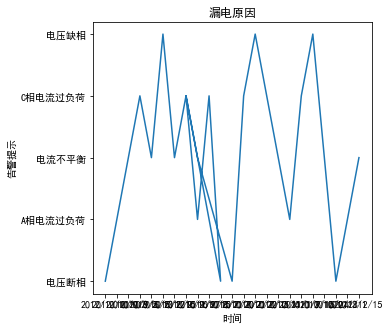

In [39]:
data3.drop_duplicates(['date', 'alarm','ID'],keep='last')
a=data3['alarm']
b=data3['date']
p=plt.figure(figsize=(5,5))
plt.xlabel('时间')
plt.ylabel('告警提示')
plt.title('漏电原因')
plt.plot(b,a,'')

漏电原因具有一定规律性，而且有3种原因发生次数为3次，其他两种分别为2次和4次。基本上原因的时间分布较为均匀，但是有些原因分布比较集中

In [40]:
# print(dat15.agg({'电量趋势下降指标':[np.mean,np.std,np.var,np.median],'线损指标':[np.mean,np.std,np.var,np.median],
#                 '告警类指标':[np.mean,np.std,np.var,np.median],'是否窃漏电':[np.mean,np.std,np.var,np.median]}))
#使用聚合agg分析离差化标准化处理后的数据
print(data3['ID'].value_counts())
print(data3['date'].value_counts())
print(data4['ID'].value_counts())
print(data4['date'].value_counts())

21261001    14
21880001     3
18403001     3
16429001     2
16940001     1
16345001     1
17059001     1
Name: ID, dtype: int64
2010/9/17     2
2010/9/16     2
2010/7/20     1
2010/5/13     1
2010/11/1     1
2011/12/15    1
2010/3/1      1
2010/7/22     1
2010/9/3      1
2010/9/6      1
2011/9/15     1
2010/8/11     1
2010/7/21     1
2010/10/24    1
2010/7/15     1
2012/10/11    1
2011/1/9      1
2010/5/12     1
2010/2/15     1
2010/11/4     1
2010/2/28     1
2010/7/25     1
2012/10/10    1
Name: date, dtype: int64
21261001    49
Name: ID, dtype: int64
2010/10/18    1
2010/9/27     1
2010/10/21    1
2010/9/7      1
2010/9/10     1
2010/11/4     1
2010/9/1      1
2010/10/15    1
2010/11/8     1
2010/9/28     1
2010/9/9      1
2010/10/29    1
2010/11/17    1
2010/11/16    1
2010/10/19    1
2010/9/6      1
2010/9/3      1
2010/11/10    1
2010/10/20    1
2010/9/15     1
2010/11/1     1
2010/9/13     1
2010/10/26    1
2010/10/11    1
2010/9/8      1
2010/11/5     1
2010/11/18    1
2010/10/2

In [41]:
data3['date']=pd.to_datetime(data3['date'])
data4['date']=pd.to_datetime(data4['date'])
year1=[i.year for i in data3['date']]
month1=[i.month for i in data3['date']]
day1=[i.day for i in data3['date']]
year2=[i.year for i in data4['date']]
month2=[i.month for i in data4['date']]
day2=[i.day for i in data4['date']]
for year in year1:
    print("the %d has found %d" %(year,year1.count(year)))
print("..............................................")
for year in year2:
    print("the %d has found %d" %(year,year2.count(year)))

the 2012 has found 2
the 2012 has found 2
the 2010 has found 20
the 2010 has found 20
the 2010 has found 20
the 2010 has found 20
the 2010 has found 20
the 2010 has found 20
the 2010 has found 20
the 2011 has found 3
the 2010 has found 20
the 2010 has found 20
the 2010 has found 20
the 2010 has found 20
the 2010 has found 20
the 2010 has found 20
the 2010 has found 20
the 2010 has found 20
the 2010 has found 20
the 2011 has found 3
the 2010 has found 20
the 2010 has found 20
the 2010 has found 20
the 2010 has found 20
the 2011 has found 3
..............................................
the 2010 has found 49
the 2010 has found 49
the 2010 has found 49
the 2010 has found 49
the 2010 has found 49
the 2010 has found 49
the 2010 has found 49
the 2010 has found 49
the 2010 has found 49
the 2010 has found 49
the 2010 has found 49
the 2010 has found 49
the 2010 has found 49
the 2010 has found 49
the 2010 has found 49
the 2010 has found 49
the 2010 has found 49
the 2010 has found 49
the 2010 has

In [42]:
for month in month1:
    print("the %d has found %d" %(month,month1.count(month)))
print("..............................................")
for month in month2:
    print("the %d has found %d" %(month,month2.count(month)))

the 10 has found 3
the 10 has found 3
the 9 has found 7
the 9 has found 7
the 5 has found 2
the 5 has found 2
the 2 has found 2
the 9 has found 7
the 9 has found 7
the 9 has found 7
the 8 has found 1
the 9 has found 7
the 9 has found 7
the 7 has found 5
the 7 has found 5
the 7 has found 5
the 7 has found 5
the 11 has found 2
the 11 has found 2
the 1 has found 1
the 7 has found 5
the 10 has found 3
the 2 has found 2
the 3 has found 1
the 12 has found 1
..............................................
the 9 has found 19
the 9 has found 19
the 9 has found 19
the 9 has found 19
the 9 has found 19
the 9 has found 19
the 9 has found 19
the 9 has found 19
the 9 has found 19
the 9 has found 19
the 9 has found 19
the 9 has found 19
the 9 has found 19
the 9 has found 19
the 9 has found 19
the 9 has found 19
the 9 has found 19
the 9 has found 19
the 9 has found 19
the 10 has found 16
the 10 has found 16
the 10 has found 16
the 10 has found 16
the 10 has found 16
the 10 has found 16
the 10 has found

In [43]:
for day in day1:
    print("the %d has found %d" %(day,day1.count(day)))
print("..............................................")
for day in day2:
    print("the %d has found %d" %(day,day2.count(day)))

the 11 has found 2
the 10 has found 1
the 3 has found 1
the 6 has found 1
the 13 has found 1
the 12 has found 1
the 15 has found 4
the 16 has found 2
the 17 has found 2
the 15 has found 4
the 11 has found 2
the 16 has found 2
the 17 has found 2
the 20 has found 1
the 21 has found 1
the 22 has found 1
the 25 has found 1
the 4 has found 1
the 1 has found 2
the 9 has found 1
the 15 has found 4
the 24 has found 1
the 28 has found 1
the 1 has found 2
the 15 has found 4
..............................................
the 1 has found 2
the 2 has found 1
the 3 has found 2
the 6 has found 1
the 7 has found 1
the 8 has found 3
the 9 has found 2
the 10 has found 2
the 13 has found 2
the 14 has found 2
the 15 has found 3
the 16 has found 2
the 17 has found 2
the 20 has found 2
the 21 has found 2
the 27 has found 2
the 28 has found 2
the 29 has found 2
the 30 has found 1
the 8 has found 3
the 11 has found 2
the 12 has found 2
the 13 has found 2
the 14 has found 2
the 15 has found 3
the 18 has found 

ID为21261001是偷漏电大户，其他用户基本上只是偶尔偷电
2010/9/17，2010/9/16是有2次偷电行为，其他都是一天一次，
集中于2010年,月份集中于7（线损），9，10，11月（偷漏电告警）
集中于15（线损）,8号和10到20号（偷漏电告警）